## Data Analysis

In [1]:
#import all relevant packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [2]:
#reading the file
df = pd.read_csv(r'../Dataset/covtype.csv',index_col=None,nrows=250000)
df.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
len(df)

250000

#### Data Cleaning based on study in the other notebook

In [4]:
#droping the columns with low standard deviation/high skewness as performed above
remaining=['Soil_Type7','Soil_Type8','Soil_Type14','Soil_Type15',
     'Soil_Type21','Soil_Type25','Soil_Type28','Soil_Type36','Soil_Type37']

In [5]:
#removing all above columns with low standard deviation as it will not impact our dependent variable
df.drop(remaining, axis=1, inplace=True)

In [6]:
# we will also remove Hillshade_3pm because of highly neagtive -0.78 co-related value
df.drop('Hillshade_3pm',axis=1, inplace=True)

### Data Modeling

In [7]:
X=df.loc[:,'Elevation':'Soil_Type40']
y=df['Cover_Type']

In [8]:
#Splitting the data into  train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

#### Using KNN

In [9]:
%%time
from sklearn.neighbors import KNeighborsClassifier

nbr = np.arange(1,7)
train_accuracy =np.empty(len(nbr))
test_accuracy = np.empty(len(nbr))

for i,j in enumerate(nbr):
    knn = KNeighborsClassifier(n_neighbors=j)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Accuracy on the training and test set respectively
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test) 

Wall time: 2min 14s


Visualizing the change in accuracies with respect to train and test data for the above loop 1 to 7

Text(0, 0.5, 'Accuracy')

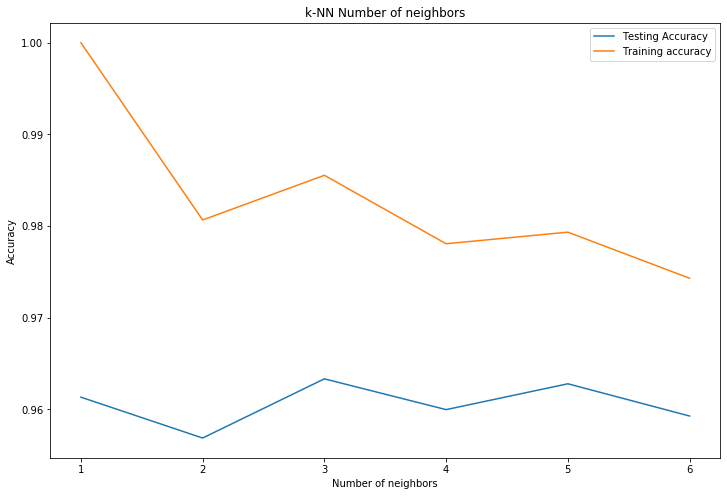

In [10]:
#Generate plot
plt.figure(figsize=(12,8))
plt.plot(nbr, test_accuracy, label='Testing Accuracy')
plt.plot(nbr, train_accuracy, label='Training accuracy')
plt.title('k-NN Number of neighbors')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
#plt.show()

Based on the above value K=5 gives us the best value

In [11]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=5) 

In [12]:
#Fitting the model
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [13]:
#Getting the accuracy for KNN
Accuracy=knn.score(X_test,y_test)
print('KNN Accuracy:',Accuracy)
print(classification_report(y_test, y_pred))
# roc_auc_score(y_test, y_pred)

KNN Accuracy: 0.96278
              precision    recall  f1-score   support

           1       0.96      0.95      0.95     14487
           2       0.97      0.98      0.97     31124
           3       0.96      0.85      0.90      1192
           4       0.87      0.94      0.90       409
           5       0.92      0.89      0.91      1146
           6       0.91      0.88      0.89       922
           7       0.93      0.93      0.93       720

    accuracy                           0.96     50000
   macro avg       0.93      0.92      0.92     50000
weighted avg       0.96      0.96      0.96     50000



### Hyperparamater Tuning

In [14]:
%%time

n_neighbors = list(range(1,40))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)

#Print The value of best Hyperparameters
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best p: 1
Best n_neighbors: 3
Wall time: 57min 25s


Keeping the leaf size to default (which is 30) the optimal distance method is Manhattan or p = 1. Then the most optimal number of K is 3.

In [15]:
#Using KNN algorithm
knn = KNeighborsClassifier(n_neighbors=3) 

In [16]:
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [17]:
#Getting the new accuracy for KNN
Accuracy=knn.score(X_test,y_test)
print('KNN Accuracy:',Accuracy)
print(classification_report(y_test, y_pred))

KNN Accuracy: 0.96332
              precision    recall  f1-score   support

           1       0.95      0.95      0.95     14487
           2       0.97      0.98      0.97     31124
           3       0.96      0.87      0.91      1192
           4       0.90      0.95      0.93       409
           5       0.92      0.90      0.91      1146
           6       0.91      0.90      0.90       922
           7       0.93      0.94      0.94       720

    accuracy                           0.96     50000
   macro avg       0.94      0.93      0.93     50000
weighted avg       0.96      0.96      0.96     50000



The accuracy increased by .01 which not significant as our model was already providing enough accuracy.

### Testing the model with user input


In [18]:
#Copying the above X dataframe into X1 dataframe for testing
X1=X

In [19]:
#dropping all datas from dataframe
X1.drop(X1.index, inplace=True)

C:\Users\souma\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
#Selected one row from the main dataset to use its value as an input for predicting the Cover_Type
pd.set_option('max_columns', None)
print("First row of the data frame:")
df.iloc[3:4]

First row of the data frame:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type26,Soil_Type27,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
3,2785,155,18,242,118,3090,238,238,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2


In [21]:
#displaying all columns in the dataframe
pd.set_option('max_columns', None)
X1.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type26,Soil_Type27,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40


In [22]:
#providing user inserted values in data frame X1
X1.loc[0] = [2785,155,18,242,118,3090,238,238,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0] 

C:\Users\souma\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [23]:
#viewing the dataframe with user input
X1.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type26,Soil_Type27,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40
0,2785,155,18,242,118,3090,238,238,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [25]:
y_pred=knn.predict(X1)

In [26]:
print("Predicted Cover Type :")
print(y_pred)

Predicted Cover Type :
[2]


### Inference

Here we used KNN algorithm and got accuracy 96.27%. Although we got a very accuracy we tried using hyperparameter to make it better but we got 96.33% (very slight increase). We also tested the data with user input and was able to predict the expected Cover Type

### Conclusion

Considering the different factors like soil_type, weather and wilderness we can classify which type of forest cover can be increased for afforestation. Classifying cover type can help further research regarding forest fire susceptibility, the spread of the Mountain Pine Beetle infestion and de/reforestation concerns. Forest cover type data is often collected
by hand or computed using remote sensing techniques, e.g. satellite imagery. Such processes are both time
and resource intensive. Hence we predicted forest cover type using cartographic data and a variety of classification algorithms.